**Saving CSV files**


The Dataset file
```
Read the question and make a table  in the format


> Feature1 Feature2 Featuren Prediction(label/class)


Save it as data.csv
```

Predicting on Given Scenario

```
If the Question has a seperate scenario we have to predict

1.   Make a table in the same format as above [No need to have target column]
2.   Only add the to be predicted row
3.   Save it as scenario.csv

```
*for now run the last rows to create the dataset or upload your dataset into colab*


**Machine Learning Programs**



Linear Regression [Base for all Regression Code]

Regression Equation: y = 6.79 + 2.19 * x
The prediction is [8.97619048]
Accuracy (model.score): 0.46080139372822293
R² Score: 0.46080139372822293
MSE: 22.10714285714286


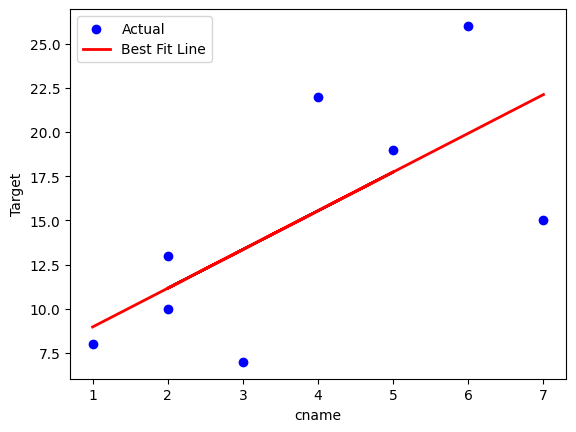

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load CSV
data = pd.read_csv("reg.csv") #The data file with the initial Table

X = data[['f1']] #feature used to predict
y = data['target'] #The target

# Train model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

#Printing the Model
intercept = model.intercept_
coefficient = model.coef_[0]
print(f"Regression Equation: y = {intercept:.2f} + {coefficient:.2f} * x")

#printing the prediction (Only need if asked in question)
scenario = pd.read_csv("scenario_reg.csv") #The scenario file
s = scenario[['f1']]
outcome = model.predict(s)
print("The prediction is",outcome)

# Accuracy & R²
print("Accuracy (model.score):", model.score(X, y))
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

# Visualization with best-fit line
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, y_pred, color="red", linewidth=2, label="Best Fit Line")
plt.xlabel("cname")
plt.ylabel("Target")
plt.legend()
plt.show()


**Naive Bayes** (Base For All Classification)

Model Predicts the outcome in the given scneario will be ['Y']
Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8


Confusion Matrix:
 [[3 0]
 [1 4]]


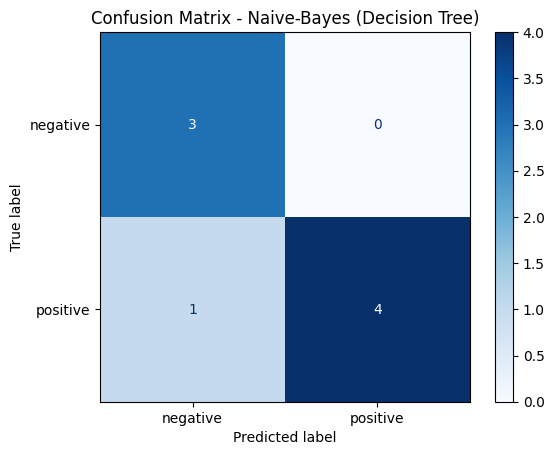

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load CSV
data = pd.read_csv("classification.csv")

# Features & target
X = data[['Chills', 'RunningNose', 'Headache', 'Fever']]
y = data['HasFlu']

# Encode target labels (HasFlu)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode feature columns
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = onehot.fit_transform(X)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_encoded, y_encoded)

# Predictions on training data
y_pred = model.predict(X_encoded)

# Predicting on new scenario
scenario = pd.read_csv("scenario_class.csv")
scenario_df = scenario[['Chills', 'RunningNose', 'Headache', 'Fever']]
scenario_encoded = onehot.transform(scenario_df)
outcome = model.predict(scenario_encoded)
outcome_labels = label_encoder.inverse_transform(outcome)

print("Model predicts the outcome in the given scenario will be:", outcome_labels)

# Evaluation
print("Accuracy:", accuracy_score(y_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_encoded, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_encoded, y_pred))

# Visualization
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_encoded, y_pred),
                              display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes (One-Hot Encoded)")
plt.show()


**ID3 (Decision Tree)**

Changed the import from GaussianNB to DecisionTreeClassifier


```
from sklearn.tree import DecisionTreeClassifier ,plot_tree
```

Changed the model initialization from GaussianNB() to DecisionTreeClassifier()

```
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
```
Addded Tree plot


```
plt.figure(figsize=(12,6))
plot_tree(model, feature_names=['housing_median_age', 'total_rooms'],
          class_names=['Below Median','Above Median'], filled=True)
plt.title("Decision Tree (ID3)")
plt.show()
```



Model predicts the outcome in the given scenario will be: ['N']
Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.80      0.89         5

    accuracy                           0.88         8
   macro avg       0.88      0.90      0.87         8
weighted avg       0.91      0.88      0.88         8


Confusion Matrix:
 [[3 0]
 [1 4]]


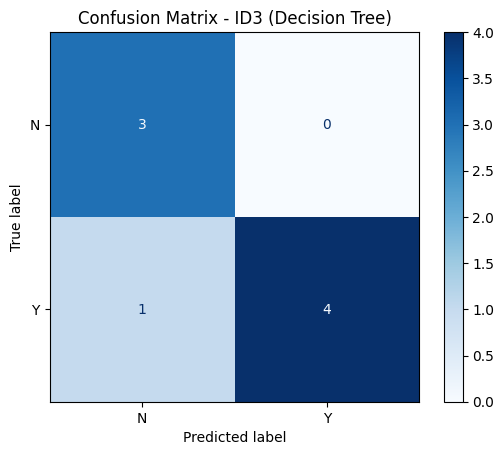

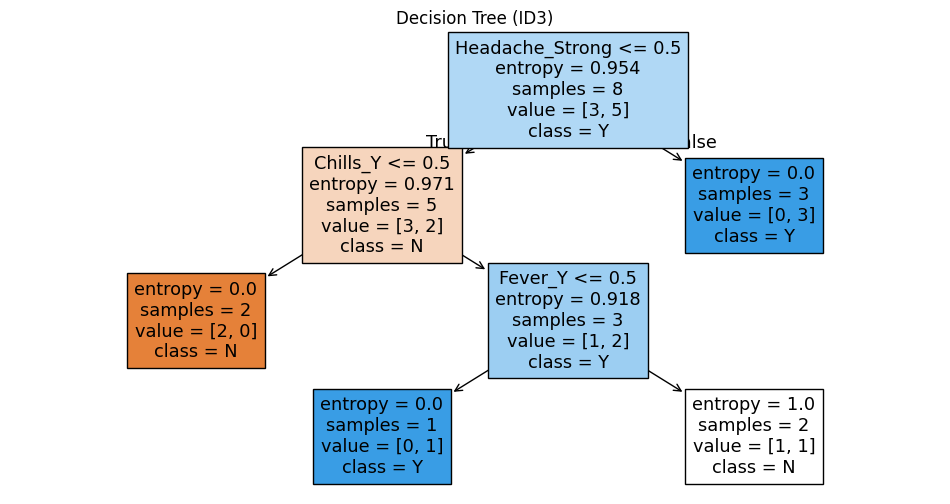

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load CSV
data = pd.read_csv("classification.csv")

# Features and target
X = data[['Chills', 'RunningNose', 'Headache', 'Fever']]
y = data['HasFlu']

# Encode target (HasFlu)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode features
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = onehot.fit_transform(X)

# Train Decision Tree (ID3 uses entropy)
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_encoded, y_encoded)

# Predictions on training data
y_pred = model.predict(X_encoded)

# Predicting on scenario
scenario = pd.read_csv("scenario_class.csv")
scenario_df = scenario[['Chills', 'RunningNose', 'Headache', 'Fever']]
scenario_encoded = onehot.transform(scenario_df)
outcome = model.predict(scenario_encoded)
outcome_labels = label_encoder.inverse_transform(outcome)

print("Model predicts the outcome in the given scenario will be:", outcome_labels)

# Accuracy and reports
print("Accuracy:", accuracy_score(y_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_encoded, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_encoded, y_pred))

# Confusion Matrix visualization
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_encoded, y_pred),
                              display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - ID3 (Decision Tree)")
plt.show()

# Decision Tree visualization
plt.figure(figsize=(12, 6))
plot_tree(model,
          feature_names=onehot.get_feature_names_out(['Chills', 'RunningNose', 'Headache', 'Fever']),
          class_names=label_encoder.classes_,
          filled=True)
plt.title("Decision Tree (ID3)")
plt.show()


**Logistic Regression**

Using Regression Dataset


 May need to apply label encoder for y if the target is a class label string


```
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
```

Only if it is a continous target else dont include this line


```
data['target'] = (data['target'] > data['target'].mean()).astype(int)
```





Model predicts the given scenario (['Low'])
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8


Confusion Matrix:
 [[5 0]
 [0 3]]


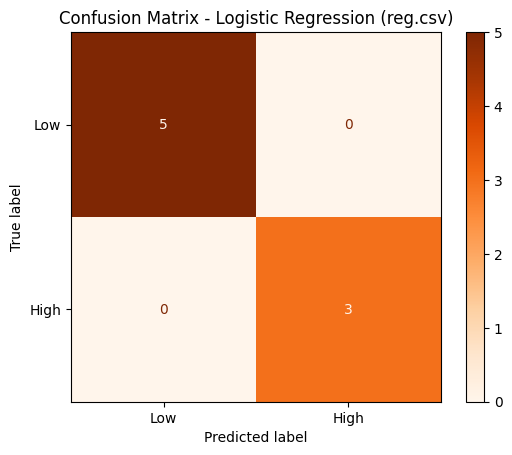

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


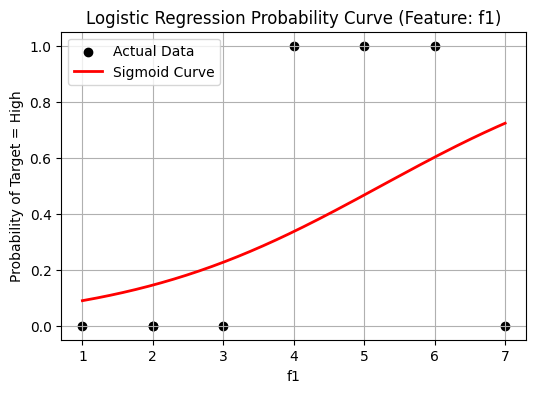

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load numeric dataset
data = pd.read_csv("reg.csv")

# Convert continuous target into binary classes for classification
# Example: target > 15 → 1 (High), else 0 (Low)
data['target'] = (data['target'] > 15).astype(int)

# Features and Target
X = data[['f1', 'f2']]
y = data['target']


# Train Logistic Regression
model = LogisticRegression()
model.fit(X, y)

# --- Scenario Prediction ---
scenario = pd.read_csv("scenario_reg.csv")
scenario_X = scenario[['f1', 'f2']]
outcome = model.predict(scenario_X)
outcome_label = ["High" if o == 1 else "Low" for o in outcome]
print(f"\nModel predicts the given scenario ({outcome_label})")

# Predictions on training data
y_pred = model.predict(X)

# Accuracy and classification metrics
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))



# Visualization 1 — Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y, y_pred),
                              display_labels=['Low','High'])
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - Logistic Regression (reg.csv)")
plt.show()



# --- Visualization 2: Sigmoid Curve for Feature f1 --- #for drawing in 2D if not a 2D dataset keep every value other than one static/average for drawing
# We'll vary f1, keeping f2 fixed (e.g., average value)
f2_fixed = np.mean(X['f2'])
X_range = np.linspace(min(X['f1']), max(X['f1']), 200).reshape(-1, 1)
X_curve = np.hstack((X_range, np.full((200, 1), f2_fixed)))

prob = model.predict_proba(X_curve)[:, 1]

plt.figure(figsize=(6,4))
plt.scatter(X['f1'], y, color='black', label='Actual Data')
plt.plot(X_range, prob, color='red', linewidth=2, label='Sigmoid Curve')
plt.title("Logistic Regression Probability Curve (Feature: f1)")
plt.xlabel("f1")
plt.ylabel("Probability of Target = High")
plt.legend()
plt.grid(True)
plt.show()


**SVM** (Support Vector Machine)

=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

=== Confusion Matrix ===
[[4 0]
 [0 4]]
=== Accuracy ===
Accuracy: 1.0


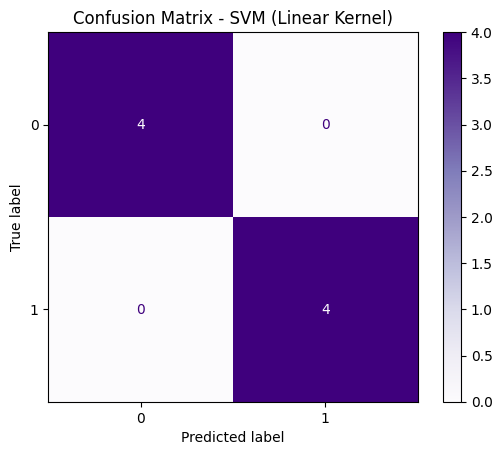

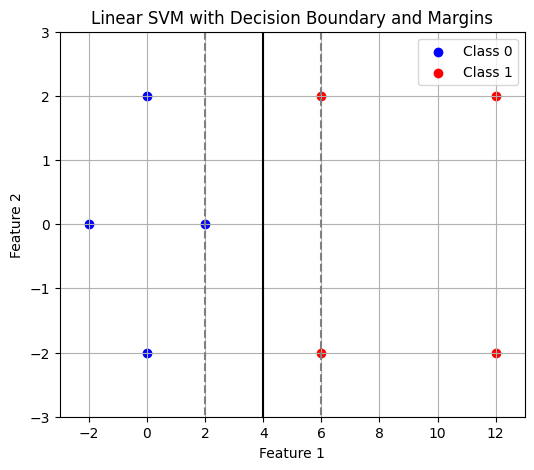

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# === Load dataset ===
df = pd.read_csv("svm.csv")

# Features and labels
X = df[['x1', 'x2']].values
y = df['label'].values

# === Train Linear SVM ===
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

# === Predictions ===
y_pred = model.predict(X)

# === Model Evaluation ===
print("=== Classification Report ===")
print(classification_report(y, y_pred))
print("=== Confusion Matrix ===")
cm = confusion_matrix(y, y_pred)
print(cm)

print("=== Accuracy ===")
print("Accuracy:", accuracy_score(y, y_pred))

# === Plot Confusion Matrix ===
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - SVM (Linear Kernel)")
plt.show()

# === Plot SVM Decision Boundary ===
plt.figure(figsize=(6, 5))
plt.scatter(df[df.label == 0].x1, df[df.label == 0].x2, color='blue', label='Class 0')
plt.scatter(df[df.label == 1].x1, df[df.label == 1].x2, color='red', label='Class 1')

# Create grid for decision function
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Decision function values
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors='k', levels=[0], linestyles=['-'])
plt.contour(xx, yy, Z, colors='gray', levels=[-1, 1], linestyles=['--'])

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linear SVM with Decision Boundary and Margins")
plt.legend()
plt.grid(True)
plt.show()


**K Means Clustering**

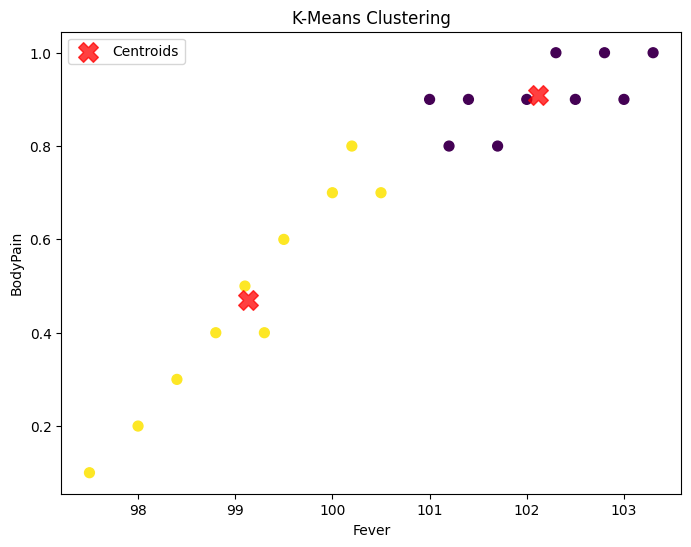

Eucleidian Distance
    Fever  BodyPain  Cluster  Distance_to_Centroid
0    97.5       0.1        1              1.671466
1    98.0       0.2        1              1.161809
2    98.4       0.3        1              0.749533
3    98.8       0.4        1              0.337343
4    99.1       0.5        1              0.042426
5    99.3       0.4        1              0.183848
6    99.5       0.6        1              0.392173
7   100.0       0.7        1              0.899889
8   100.2       0.8        1              1.119732
9   100.5       0.7        1              1.389172
10  101.0       0.9        0              1.120045
11  101.2       0.8        0              0.926553
12  101.4       0.9        0              0.720069
13  101.7       0.8        0              0.434166
14  102.0       0.9        0              0.120416
15  102.3       1.0        0              0.201246
16  102.5       0.9        0              0.380132
17  102.8       1.0        0              0.685930
18  103.0  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 1: Load the dataset
df = pd.read_csv("cluster.csv")

# Select features for clustering
X = df[['Fever', 'BodyPain']].values

# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=32)
kmeans.fit(X)

# Step 3: Get cluster assignments and centroids
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

# Step 4: Plot results (longitude and latitude)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.xlabel('Fever')
plt.ylabel('BodyPain')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

#Eucleidian Distance Calculation (Only When asked)

print("Eucleidian Distance")
import numpy as np

# Step 3.5: Calculate Euclidean distance from each point to its assigned centroid
distances = np.linalg.norm(X - centers[y_kmeans], axis=1)

# Add the distances to your DataFrame for clarity
df['Cluster'] = y_kmeans
df['Distance_to_Centroid'] = distances

# Display first few rows
print(df)


**Optional**

If you dont want to create a new csv for scenario you can just create a Dataframe directly in python



```
scenario = pd.DataFrame({
    'Chills': ['Y'],
    'RunningNose': ['N'],
    'Headache': ['Mild'],
    'Fever': ['Y']
})
```



IF Dataset Contain atleast 100 points include train_test_split


import
```
from sklearn.model_selection import train_test_split
```

Use
```
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,          # 30% of data for testing
    random_state=42,        # For reproducibility
)
```
All the Training should use X_train,y_train

All the testing and plotting should use X_test,y_test

Substitutethese variables accordingly



**Multi Variable Linear Regression**

Added Additional Feature

```
X = data[['f1', 'f2']]
```

Added the new coefficient in Equation printing (Add More coefficients as features increase)

```
print("Regression Equation:")
print(f"y = {intercept:.2f} + ({coefficients[0]:.2f})*f1 + ({coefficients[1]:.2f})*f2")
```
Visualizing actual vs predicted and ideal line as regression line is a plane and cant be easily modelled

```
plt.scatter(y, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label="Ideal Fit (y = ŷ)")
plt.xlabel("Actual Target (y)")
plt.ylabel("Predicted Target (ŷ)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

```







Regression Equation:
y = -1.48 + (1.94)*f1 + (3.51)*f2

Predicted outcome(s): [7.47395833]

Accuracy (model.score): 0.9745220401422764
R² Score: 0.9745220401422764
MSE: 1.044596354166666


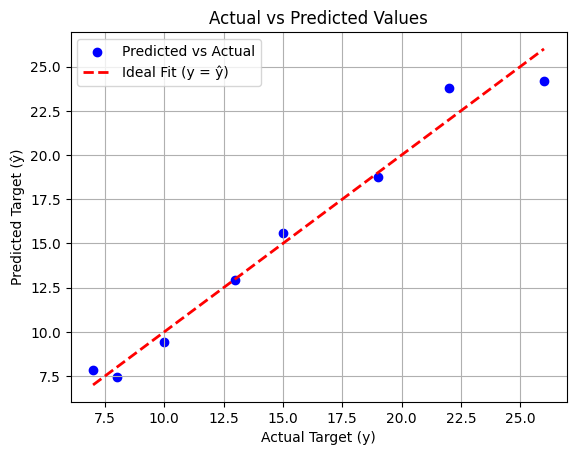

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load CSV
data = pd.read_csv("reg.csv")  # The data file

X = data[['f1', 'f2']]  # features
y = data['target']       # target

# Train model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Printing the Model (Multiple Regression Equation)
intercept = model.intercept_
coefficients = model.coef_
print("Regression Equation:")
print(f"y = {intercept:.2f} + ({coefficients[0]:.2f})*f1 + ({coefficients[1]:.2f})*f2")

# Scenario prediction (optional)
scenario = pd.read_csv("scenario_reg.csv")
s = scenario[['f1', 'f2']]
outcome = model.predict(s)
print("\nPredicted outcome(s):", outcome)

# Accuracy metrics
print("\nAccuracy (model.score):", model.score(X, y))
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

# Visualization — Actual vs Predicted
plt.scatter(y, y_pred, color="blue", label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2, label="Ideal Fit (y = ŷ)")
plt.xlabel("Actual Target (y)")
plt.ylabel("Predicted Target (ŷ)")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


Polynomial

added import


```
from sklearn.preprocessing import PolynomialFeatures
```



added This before test train split

```
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
```

Sorting For smooth visualization


```
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
X_seq_poly = poly.transform(X_seq)
y_seq = model.predict(X_seq_poly)
```





Coefficients: [   0.         -496.94452186   22.42057265]
Intercept: 199357.7819551872
Accuracy (model.score): 0.010237350308916593
R² Score: 0.010237350308916593
MSE: 12464599876.92636


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


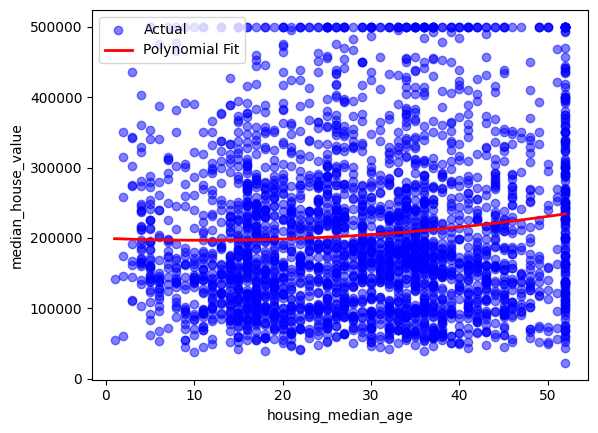

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as pltravel
import numpy as np

# Load CSV
data = pd.read_csv("/content/sample_data/california_housing_test.csv")

X = data[['housing_median_age']]
y = data['median_house_value']

# Polynomial transformation (degree=2 for example)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

#print The coefs and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Accuracy & R²
print("Accuracy (model.score):", model.score(X_test, y_test))
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualization (sort X for smooth curve)
X_seq = np.linspace(X.min(), X.max(), 300).reshape(-1,1)
X_seq_poly = poly.transform(X_seq)
y_seq = model.predict(X_seq_poly)

plt.scatter(X, y, color="blue", alpha=0.5, label="Actual")
plt.plot(X_seq, y_seq, color="red", linewidth=2, label="Polynomial Fit")
plt.xlabel("housing_median_age")
plt.ylabel("median_house_value")
plt.legend()
plt.show()


Multivariable Linear Regression

import Added Numpy

changed X from 1 variable to 2


```
X = data[['housing_median_age', 'total_rooms']]
```

Visualization  Added lines (Actual Vs Predicted Visualization Only)


```
line = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
plt.plot(line, line, color="red", linewidth=2, label="Best Fit Line")
```




Coefficients: [1501.69520152   11.2183234 ]
Intercept: 134558.2459776409
Accuracy (model.score): 0.07051389960453647
R² Score: 0.07051389960453647
MSE: 11705505694.936136


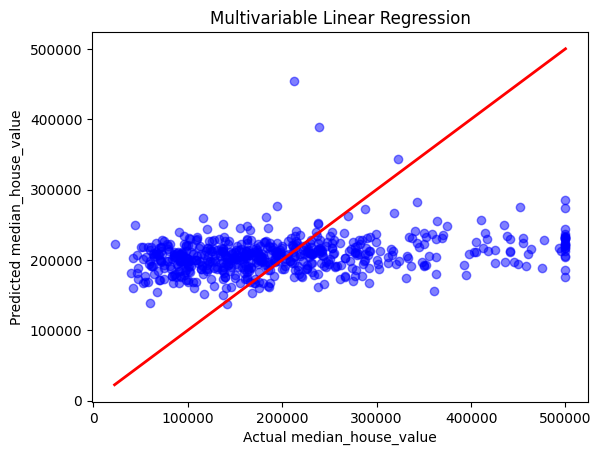

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# Load CSV
data = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Use two features instead of one
X = data[['housing_median_age', 'total_rooms']]
y = data['median_house_value']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

#print The coefs and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Accuracy & R²
print("Accuracy (model.score):", model.score(X_test, y_test))
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Visualization
plt.scatter(y_test, y_pred, color="blue", alpha=0.5)
line = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
plt.plot(line, line, color="red", linewidth=2, label="Best Fit Line")
plt.xlabel("Actual median_house_value")
plt.ylabel("Predicted median_house_value")
plt.title("Multivariable Linear Regression")
plt.show()


logistic On a classification Dataset *(Would not be asked likely and is not feasable to draw the sigmoid graph properly)*

Model predicts the outcome in the given scenario will be: ['Y']

Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

           N       1.00      0.67      0.80         3
           Y       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8


Confusion Matrix:
 [[2 1]
 [0 5]]


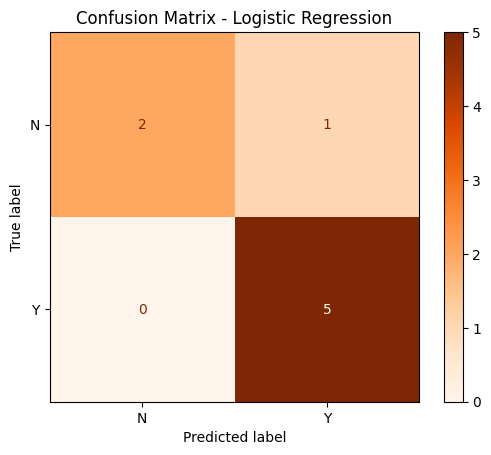

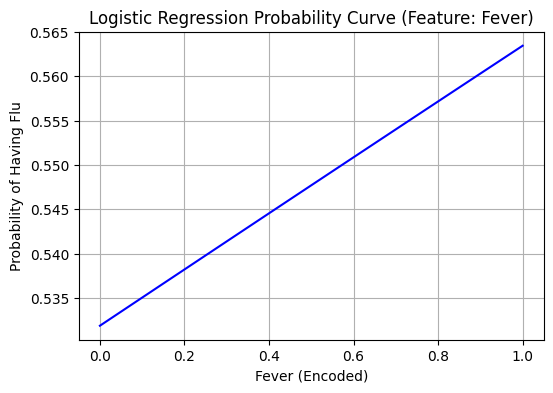

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load CSV ===
data = pd.read_csv("classification.csv")

# === Features and Target ===
X = data[['Chills', 'RunningNose', 'Headache', 'Fever']]
y = data['HasFlu']

# === Encode Target ===
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# === One-Hot Encode Features ===
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = onehot.fit_transform(X)

# === Train Logistic Regression ===
model = LogisticRegression(random_state=32, solver='liblinear')
model.fit(X_encoded, y_encoded)

# === Predictions on Training Data ===
y_pred = model.predict(X_encoded)

# === Predicting on New Scenario ===
scenario = pd.read_csv("scenario_class.csv")
scenario_df = scenario[['Chills', 'RunningNose', 'Headache', 'Fever']]

# Apply same one-hot encoder (no refitting)
scenario_encoded = onehot.transform(scenario_df)
outcome = model.predict(scenario_encoded)
outcome_labels = label_encoder.inverse_transform(outcome)

print("Model predicts the outcome in the given scenario will be:", outcome_labels)

# === Accuracy and Reports ===
print("\nAccuracy:", accuracy_score(y_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_encoded, y_pred, target_names=label_encoder.classes_))
print("\nConfusion Matrix:\n", confusion_matrix(y_encoded, y_pred))

# === Visualization 1: Confusion Matrix ===
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_encoded, y_pred),
                              display_labels=label_encoder.classes_)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# === Visualization 2: Logistic Regression Probability Curve (Feature: Fever) ===
# We'll vary 'Fever' and hold other features constant at their first encoded state
fever_index = [i for i, name in enumerate(onehot.get_feature_names_out(['Chills', 'RunningNose', 'Headache', 'Fever']))
               if 'Fever' in name]

# Create dummy data
X_plot = np.linspace(0, 1, 100).reshape(-1, 1)
X_dummy = np.zeros((100, X_encoded.shape[1]))
# Adjust only Fever feature columns (since OneHot creates multiple)
for idx in fever_index:
    X_dummy[:, idx] = X_plot[:, 0]  # vary fever features

# Predict probabilities
prob = model.predict_proba(X_dummy)[:, 1]

# Plot sigmoid curve
plt.figure(figsize=(6, 4))
plt.plot(X_plot, prob, color='blue')
plt.title("Logistic Regression Probability Curve (Feature: Fever)")
plt.xlabel("Fever (Encoded)")
plt.ylabel("Probability of Having Flu")
plt.grid(True)
plt.show()


KNN

Starting KNN model training...
KNN model training complete.

=== Classification Report (KNN) ===
                    precision    recall  f1-score   support

Below Median Value       0.84      0.85      0.84      1656
Above Median Value       0.86      0.84      0.85      1744

          accuracy                           0.85      3400
         macro avg       0.85      0.85      0.85      3400
      weighted avg       0.85      0.85      0.85      3400


=== Confusion Matrix (KNN) ===
[[1408  248]
 [ 272 1472]]


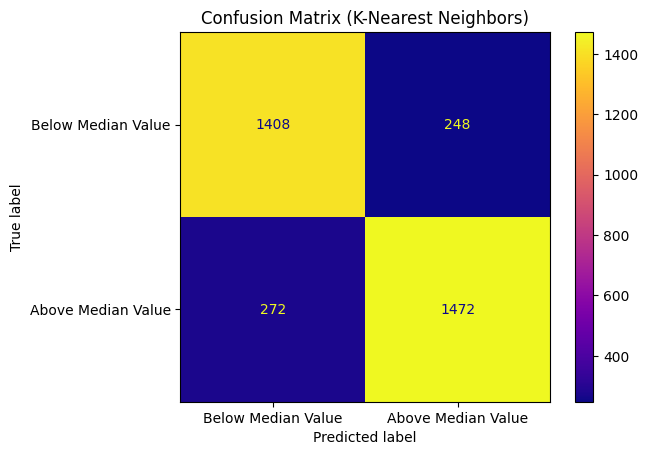

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load CSV data
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# Select features (X)
X = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income']]

# Define binary target (y): 1 if median_house_value is above the median, 0
median_value = df['median_house_value'].median()
y = (df['median_house_value'] > median_value).astype(int).values

# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

X_encoded = X

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Define and train KNN model
model = KNeighborsClassifier(
    n_neighbors=5,
    metric='minkowski',
    p=2
)

print("Starting KNN model training...")
model.fit(X_train, y_train)
print("KNN model training complete.")

# Predict
y_pred = model.predict(X_test)

# Print classification report
print("\n=== Classification Report (KNN) ===")
print(classification_report(y_test, y_pred, target_names=['Below Median Value', 'Above Median Value']))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n=== Confusion Matrix (KNN) ===")
print(cm)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Below Median Value', 'Above Median Value'])
disp.plot(cmap='plasma')
plt.title("Confusion Matrix (K-Nearest Neighbors)")
plt.show()

File Handling (Only For colab)


*For lab Just save the initial table as data.csv and the scenario as scenario.csv *

This %%writefile command only works in colab and jupyter notebook and it is not recomended as creating in excel is easier :)

In [ ]:
%%writefile classification.csv
Chills,RunningNose,Headache,Fever,HasFlu
Y,N,Mild,Y,N
Y,Y,No,N,Y
Y,N,Strong,Y,Y
N,Y,Mild,Y,N
N,N,No,N,N
N,Y,Strong,Y,Y
Y,Y,Strong,N,Y
Y,N,Mild,Y,Y

Overwriting classification.csv


In [ ]:
%%writefile scenario_class.csv
Chills,RunningNose,Headache,Fever
Y,N,Mild,Y

Overwriting scenario_class.csv


In [ ]:
%%writefile reg.csv
f1,f2,target
1,2,8
2,3,13
3,1,7
4,5,22
5,3,19
2,2,10
6,4,26
7,1,15

Writing reg.csv


In [ ]:
%%writefile scenario_reg.csv
f1,f2,target
1,2,8

Writing scenario_reg.csv


In [ ]:
%%writefile cluster.csv
Fever,BodyPain
97.5,0.1
98.0,0.2
98.4,0.3
98.8,0.4
99.1,0.5
99.3,0.4
99.5,0.6
100.0,0.7
100.2,0.8
100.5,0.7
101.0,0.9
101.2,0.8
101.4,0.9
101.7,0.8
102.0,0.9
102.3,1.0
102.5,0.9
102.8,1.0
103.0,0.9
103.3,1.0


Writing cluster.csv


In [ ]:
%%writefile svm.csv
x1,x2,label
6,2,1
6,-2,1
12,2,1
12,-2,1
2,0,0
0,2,0
0,-2,0
-2,0,0



Writing svm.csv


**ANN**

Changed the import from GaussianNB to MLPClassifier and added StandardScaler


```
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
```
Changed model initialization from GaussianNB() to MLPClassifier()

```
model = MLPClassifier(hidden_layer_sizes=(10, 5),
                      activation='relu',
                      solver='adam',
                      max_iter=1000,
                      random_state=42)

```
Added feature scaling step before training

```
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
```

Changed X_encoded to X_scaled for using the Scaled data for Training and prediction

```
model.fit(X_scaled, y)
y_pred = model.predict(X_scaled)
```

Scaled the scenario input before prediction
```
scenario_scaled = scaler.transform(scenario_encoded)
outcome = model.predict(scenario_scaled)
```






Model predicts the outcome in the given scenario(s) will be: ['Y']

=== Accuracy ===
Accuracy: 0.875

=== Classification Report ===
              precision    recall  f1-score   support

           N       1.00      0.67      0.80         3
           Y       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8


=== Confusion Matrix ===
[[2 1]
 [0 5]]


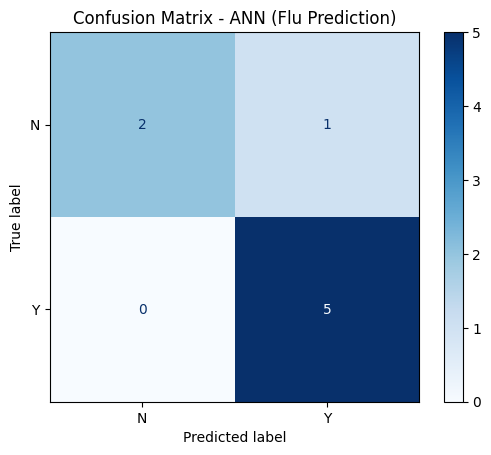

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# === Load CSV ===
data = pd.read_csv("classification.csv")

# === Features and Target ===
X = data[['Chills', 'RunningNose', 'Headache', 'Fever']]
y = data['HasFlu']

# === Encode Target ===
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# === One-Hot Encode Features ===
onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = onehot.fit_transform(X)

# === Feature Scaling ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# === Train ANN ===
model = MLPClassifier(hidden_layer_sizes=(10, 5),
                      activation='relu',
                      solver='adam',
                      max_iter=1000,
                      random_state=42)
model.fit(X_scaled, y_encoded)
c
# === Predictions on Training Data ===
y_pred = model.predict(X_scaled)

# === Predicting on Scenario ===
scenario = pd.read_csv("scenario_class.csv")
scenario_df = scenario[['Chills', 'RunningNose', 'Headache', 'Fever']]
scenario_encoded = onehot.transform(scenario_df)
scenario_scaled = scaler.transform(scenario_encoded)

outcome = model.predict(scenario_scaled)
outcome_labels = label_encoder.inverse_transform(outcome)

print("Model predicts the outcome in the given scenario(s) will be:", outcome_labels)

# === Accuracy and Reports ===
print("\n=== Accuracy ===")
print("Accuracy:", accuracy_score(y_encoded, y_pred))

print("\n=== Classification Report ===")
print(classification_report(y_encoded, y_pred, target_names=label_encoder.classes_))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_encoded, y_pred)
print(cm)

# === Visualization ===
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - ANN (Flu Prediction)")
plt.show()
